In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def two_points(f,a,b,ua,uda, n):

    h = (b-a)/n
    x = [a + h *i for i in range(n+1)]
    A = (np.eye(n) - 2*np.diag(np.ones(n-1), -1) + np.diag(np.ones(n-2), -2))/(h**2)

    fu = [f(x[i]) for i in range(0,n)]

    # Aproximamos la derivada y'(a) = uda
    # (U1 - U0)/h**2 = uda/h pero conocemos U0, U1/h**2 = uda/h + U0/h**2
    fu[0] = uda/h + ua/h**2

    # (U0 - 2U1 + U2)/h**2 = f1 pero conocemos U0, (-2U1 + U2)/h**2 = f1 - U0/h**2
    fu[1] = fu[1] - ua/h**2

    u = np.array([ua])
    u = np.append(u, np.linalg.solve(A, fu))

    return u, x

In [3]:
def fun_a(z):
    L = 30
    E = 1.25 * (10**8)
    I = 0.05
    f = 60
    return (L-z)**2 * f/(2*E*I)


u, z = two_points(fun_a, 0, 1, 0,0, 50)

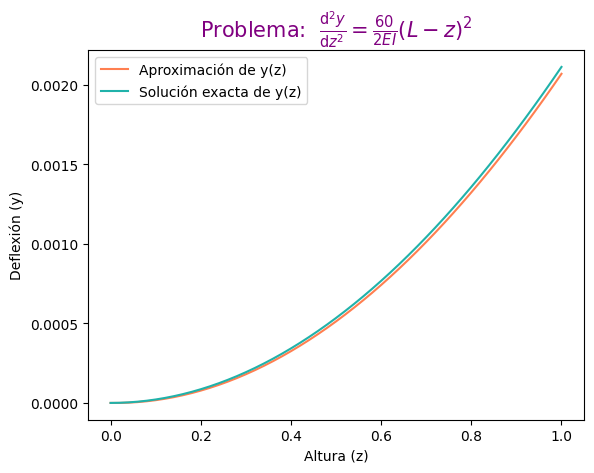

In [15]:
# Calculamos la solución exacta para verificar que la aproximación sea confiable
L, E, I, f = 30, 1.25*(10**8), 0.05, 60
c = f/(2*E*I)
exacta = [(c/12)*(L-z)**4 + z*c*(L**3)/3 - c*(L**4)/12 for z in z]

plt.plot(z, u, label="Aproximación de y(z)", color = 'coral')
plt.plot(z, exacta, label="Solución exacta de y(z)", color = 'lightseagreen')
plt.xlabel("Altura (z)")
plt.ylabel("Deflexión (y)")
plt.title(r'Problema:  $ \frac{\mathrm{d}^{2}y}{\mathrm{d} z^{2}} = \frac{60}{2EI}(L-z)^{2}$', color = 'purple', fontsize = 15)
plt.legend()
plt.show()

In [5]:
def fun_b(z):
    L = 30
    E = 1.25 * (10**8)
    I = 0.05
    f = np.exp(-2*z/30) * 200 * z /(5 + z)
    return (L-z)**2 * f/(2*E*I)

ua, za = two_points(fun_a, 0, 10, 0,0, 500)
ub, zb = two_points(fun_b, 0, 10, 0,0, 500)

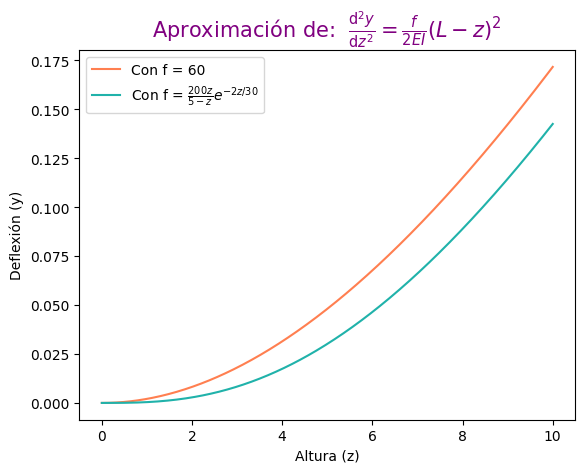

In [14]:
plt.plot(za, ua, label="Con f = 60", color = 'coral')
plt.plot(zb, ub, label=r'Con f = $\frac{200z}{5+z}e^{-2z/30}$', color = 'lightseagreen')
plt.xlabel("Altura (z)")
plt.ylabel("Deflexión (y)")
plt.title(r'Aproximación de:  $\frac{\mathrm{d}^{2}y}{\mathrm{d} z^{2}} = \frac{f}{2EI}(L-z)^{2}$', color = 'purple', fontsize = 15)
plt.legend()
plt.show()